# EDA

**分析的流程应该是什么样子的？想达到什么目的，具体完成什么事情？**

EDA 的流程：
1. 了解数据的基本情况。数据的形式、数据量、数据是否异常（**如何检测异常**）、缺失值、重复等；
2. 变量分析，分析特征的特点、特征之间的关系，冗余性等；
3. 模型分析，完成模型训练后，分析模型的效果，是否存在欠拟合/过拟合问题，是否存在某些样本上效果好/坏，调整模型。

目的：
- 确定使用什么算法；
- 挖掘特征，特征工程；
- 模型调优。

**确定使用的算法前：**  
具体要做：
1. 确定特征的类型，取值范围（连续特征）、取值数量（离散特征）；
2. 检查数据的基本情况：是否异常、缺失值、重复数据、数据分布；
3. 数据中是否有时间特征，如何处理；
4. 业务场景的分析。


In [64]:
!python --version

Python 3.8.12


In [135]:
!conda install -y matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/anaconda3/envs/handm

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       he6710b0_2         375 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    expat-2.4.4                |       h295c915_0         169 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    glib-2.69.1                |       h4ff587b_1         1.7 MB
    kiwisolver-1.3.2           |   py38h295c915_0          80 KB
    libwebp-1.2.2              |       h55f646e_0          80 KB
    libwebp-base-1.2.2         |       h7f8727e_0         440 KB
    matplo

In [92]:
import sys
print(sys.executable)

/home/anaconda3/envs/handm/bin/python


In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

from collections import Counter
import os

In [2]:
data_path = "./data"
os.listdir(data_path)

['transactions_train.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv',
 'customers.csv',
 'articles.csv']

# articles

`shape=(105542, 25)`  
特征：
1. article_id (int64, )：物品 id，9 位数
2. product_code (int64)：产品编码，6 位数，为 article_id 的前 6 位
3. prod_name (str)：产品名称
4. product_type_no (int64)：产品类型编码
5. product_type_name (str)：产品类型名称
6. product_group_name (str)：产品组别名称
7. graphical_appearance_no (int64)：图形外观编码
8. graphical_appearance_name (str)：图形外观名称
9. colour_group_code (int64)：颜色组别编码
10. colour_group_name (str)：颜色组别名称
11. [perceived_colour](https://www.liveabout.com/seeing-local-perceived-and-pictorial-color-4067694#:~:text=The%20perceived%20color%20consists%20of%20the%20subtle%20changes,reflections%20of%20ambient%20colors%20cast%20on%20your%20subject.)_value_id (int64)：感知颜色值 id
12. perceived_colour_value_name (str)：感知颜色值名称
13. perceived_colour_master_id (int64)：感知颜色主 id
14. perceived_colour_master_name (str)：感知颜色主名称
15. department_no (int64)：类型（款式）编号
16. department_name (str)：类型名称
17. index_code (str)：索引编码
18. index_name (str)：索引名称（如运动、女士配饰、男装）
19. index_group_no (int64)：索引组别编号
20. index_group_name (str)：索引组别名称
21. section_no (int64)：节编号
22. section_name (str)：节名称
23. garment_group_no (int64)：服装组别编号
24. garment_group_name (str)：服装组名称
25. detail_desc (str, 缺失416)：详细描述

从上面可以看到，大部分都是类别特征，除了 `article_id, product_group_name, detail_desc` 5 个外，其余 20 个特征均为成对（特征的名字、特征的类别编码）的类别特征。

**是否重复：** 无。  

|    | feature                      | dtype   |   num_null |   num_unique |
|---:|:-----------------------------|:--------|-----------:|-------------:|
|  0 | article_id                   | int64   |          0 |       105542 |
|  1 | product_code                 | int64   |          0 |        47224 |
|  2 | prod_name                    | str     |          0 |        45875 |
|  3 | product_type_no              | int64   |          0 |          132 |
|  4 | product_type_name            | str     |          0 |          131 |
|  5 | product_group_name           | str     |          0 |           19 |
|  6 | graphical_appearance_no      | int64   |          0 |           30 |
|  7 | graphical_appearance_name    | str     |          0 |           30 |
|  8 | colour_group_code            | int64   |          0 |           50 |
|  9 | colour_group_name            | str     |          0 |           50 |
| 10 | perceived_colour_value_id    | int64   |          0 |            8 |
| 11 | perceived_colour_value_name  | str     |          0 |            8 |
| 12 | perceived_colour_master_id   | int64   |          0 |           20 |
| 13 | perceived_colour_master_name | str     |          0 |           20 |
| 14 | department_no                | int64   |          0 |          299 |
| 15 | department_name              | str     |          0 |          250 |
| 16 | index_code                   | str     |          0 |           10 |
| 17 | index_name                   | str     |          0 |           10 |
| 18 | index_group_no               | int64   |          0 |            5 |
| 19 | index_group_name             | str     |          0 |            5 |
| 20 | section_no                   | int64   |          0 |           57 |
| 21 | section_name                 | str     |          0 |           56 |
| 22 | garment_group_no             | int64   |          0 |           21 |
| 23 | garment_group_name           | str     |          0 |           21 |
| 24 | detail_desc                  | str     |        416 |        43404 |

从上表中可以看到，一对（编码，名字）特征对，其取值数量并不相等，如 `product_type_no, produt_type_name` 的取值数量分别是 `132, 131`，存在这个问题的特征对：
- `product_code, prod_name`
- `product_type_no, produt_type_name`
- `department_no, department_name`
- `section_no, section_name`

**分析**：简单总结：
- 物品中不存在重复行
- 物品特征中除去 `article_id, detail_desc` 外，其余均为类别特征
- 且这些类别特征均没有缺失值
- 类别特征编号与类别特征的名字组成一对，共有 12 对，但是**编号和名字的数量不一定相等**
- 存在 416 个物品的 `detail_desc` **缺失**了

## 基本信息

In [57]:
arts = pd.read_csv(os.path.join(data_path, "articles.csv"))
arts.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_no  product_group_name  \
0          Vest top                 8  Garment Upper body   
1          Vest top                 8  Garment Upper body   
2          Vest top                 8  Garment Upper body   
3               Bra                17           Underwear   
4               Bra                17           Underwear   

   graphical_appearance_no graphical_appearance_name  colour_group_code  ...  \
0                  1010016                     Solid                  9  ...   
1                  1010016                     Solid                 10  ...   
2                  1010017                    Stripe                 11  ...   
3                  1010016                     Solid                  9  ...   
4                  1010016                     Solid                 10  ...   

  department_name  index_code        index_name  index_group_no  \
0    Jersey Basic           A        Ladieswear               1   
1    Jersey Basic           A        Ladieswear               1   
2    Jersey Basic           A        Ladieswear               1   
3  Clean Lingerie           B  Lingeries/Tights               1   
4  Clean Lingerie           B  Lingeries/Tights               1   

  index_group_name  section_no            section_name garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics             1002   
1       Ladieswear          16  Womens Everyday Basics             1002   
2       Ladieswear          16  Womens Everyday Basics             1002   
3       Ladieswear          61         Womens Lingerie             1017   
4       Ladieswear          61         Womens Lingerie             1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 26 columns]

In [117]:
feat_pairs = [['product_code', 'prod_name'],
              ['product_type_no', 'product_type_name'],
              ['department_no', 'department_name'],
              ['section_no', 'section_name']]
fp = feat_pairs[0]
Counter(arts.loc[:, fp][~arts.loc[:, fp].duplicated()][fp[1]]).most_common(n=10)

[('Bowie', 8),
 ('Molly dress', 8),
 ('Lauren', 7),
 ('Sandy', 7),
 ('Bella dress', 7),
 ('Dolly dress', 7),
 ('Melrose', 7),
 ('SKINNY LINED', 7),
 ('DANTE set', 6),
 ('Jonna beanie', 6)]

In [7]:
arts.describe()

article_id   product_code  product_type_no  graphical_appearance_no  \
count  1.055420e+05  105542.000000    105542.000000             1.055420e+05   
mean   6.984246e+08  698424.563378       234.861875             1.009515e+06   
std    1.284624e+08  128462.384432        75.049308             2.241359e+04   
min    1.087750e+08  108775.000000        -1.000000            -1.000000e+00   
25%    6.169925e+08  616992.500000       252.000000             1.010008e+06   
50%    7.022130e+08  702213.000000       259.000000             1.010016e+06   
75%    7.967030e+08  796703.000000       272.000000             1.010016e+06   
max    9.594610e+08  959461.000000       762.000000             1.010029e+06   

       colour_group_code  perceived_colour_value_id  \
count      105542.000000              105542.000000   
mean           32.233822                   3.206183   
std            28.086154                   1.563839   
min            -1.000000                  -1.000000   
25%             9.000000                   2.000000   
50%            14.000000                   4.000000   
75%            52.000000                   4.000000   
max            93.000000                   7.000000   

       perceived_colour_master_id  department_no  index_group_no  \
count               105542.000000  105542.000000   105542.000000   
mean                     7.807972    4532.777833        3.171534   
std                      5.376727    2712.692011        4.353234   
min                     -1.000000    1201.000000        1.000000   
25%                      4.000000    1676.000000        1.000000   
50%                      5.000000    4222.000000        2.000000   
75%                     11.000000    7389.000000        4.000000   
max                     20.000000    9989.000000       26.000000   

          section_no  garment_group_no  
count  105542.000000     105542.000000  
mean       42.664219       1010.438290  
std        23.260105          6.731023  
min         2.000000       1001.000000  
25%        20.000000       1005.000000  
50%        46.000000       1009.000000  
75%        61.000000       1017.000000  
max        97.000000       1025.000000

In [231]:
columns = arts.columns
dtypes = arts.dtypes
n_row = arts.shape[0]
print(f"shape={arts.shape}")
data = []

for i, e in enumerate(columns, start=1):
    t = dtypes.iloc[i-1]
    t = "str" if t == "object" else t
    null_row = arts.loc[:, e].isnull().sum()
    nunique = arts.loc[:, e].nunique()
#     print(f"{i}. {e} ({t}{', null= ' + str(null_row) if null_row > 0 else ''}, nunique={nunique})：")
    data.append((e, t, null_row, nunique))
    
df = pd.DataFrame(data, columns=['feature', 'dtype', 'num_null', 'num_unique'])
df

shape=(105542, 26)


feature  dtype  num_null  num_unique
0                     article_id  int64         0      105542
1                   product_code  int64         0       47224
2                      prod_name    str         0       45875
3                product_type_no  int64         0         132
4              product_type_name    str         0         131
5               product_group_no  int64         0          19
6             product_group_name    str         0          19
7        graphical_appearance_no  int64         0          30
8      graphical_appearance_name    str         0          30
9              colour_group_code  int64         0          50
10             colour_group_name    str         0          50
11     perceived_colour_value_id  int64         0           8
12   perceived_colour_value_name    str         0           8
13    perceived_colour_master_id  int64         0          20
14  perceived_colour_master_name    str         0          20
15                 department_no  int64         0         299
16               department_name    str         0         250
17                    index_code    str         0          10
18                    index_name    str         0          10
19                index_group_no  int64         0           5
20              index_group_name    str         0           5
21                    section_no  int64         0          57
22                  section_name    str         0          56
23              garment_group_no  int64         0          21
24            garment_group_name    str         0          21
25                   detail_desc    str       416       43404

In [120]:
# 无重复行
arts.duplicated().sum()

0

## 特征取值分布

查看不同特征取值分布，即不同取值的样本数量分布。注意：只统计了取值为非 null 的样本

|    | feature                    |   nunique |   min |   max |        mean |
|---:|:---------------------------|----------:|------:|------:|------------:|
|  0 | product_code               |     47224 |     1 |    75 |     2.23492 |
|  1 | product_type_no            |       132 |     1 | 11169 |   799.561   |
|  2 | product_group_no           |        19 |     2 | 42741 |  5554.84    |
|  3 | graphical_appearance_no    |        30 |     8 | 49747 |  3518.07    |
|  4 | colour_group_code          |        50 |    14 | 22670 |  2110.84    |
|  5 | perceived_colour_value_id  |         8 |    28 | 42706 | 13192.8     |
|  6 | perceived_colour_master_id |        20 |     3 | 22585 |  5277.1     |
|  7 | department_no              |       299 |     1 |  2032 |   352.983   |
|  8 | index_code                 |        10 |  3392 | 26001 | 10554.2     |
|  9 | index_group_no             |         5 |  3392 | 39737 | 21108.4     |
| 10 | section_no                 |        57 |     1 |  7295 |  1851.61    |
| 11 | garment_group_no           |        21 |   908 | 21445 |  5025.81    |

In [237]:
cat_feats = list(filter(lambda x: x.endswith('no') or x.endswith('code') or x.endswith('id'), columns))
cat_feats.remove('article_id')
cat_feats

['product_code',
 'product_type_no',
 'product_group_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_code',
 'index_group_no',
 'section_no',
 'garment_group_no']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
                product_code :  47224,      1,     75,     2.23
             product_type_no :    132,      1,  11169,   799.56
            product_group_no :     19,      2,  42741,  5554.84
     graphical_appearance_no :     30,      8,  49747,  3518.07
           colour_group_code :     50,     14,  22670,  2110.84
   perceived_colour_value_id :      8,     28,  42706, 13192.75
  perceived_colour_master_id :     20,      3,  22585,  5277.10
               department_no :    299,      1,   2032,   352.98
                  index_code :     10,   3392,  26001, 10554.20
              index_group_no :      5,   3392,  39737, 21108.40
                  section_no :     57,      1,   7295,  1851.61
            garment_group_no :     21,    908,  21445,  5025.81


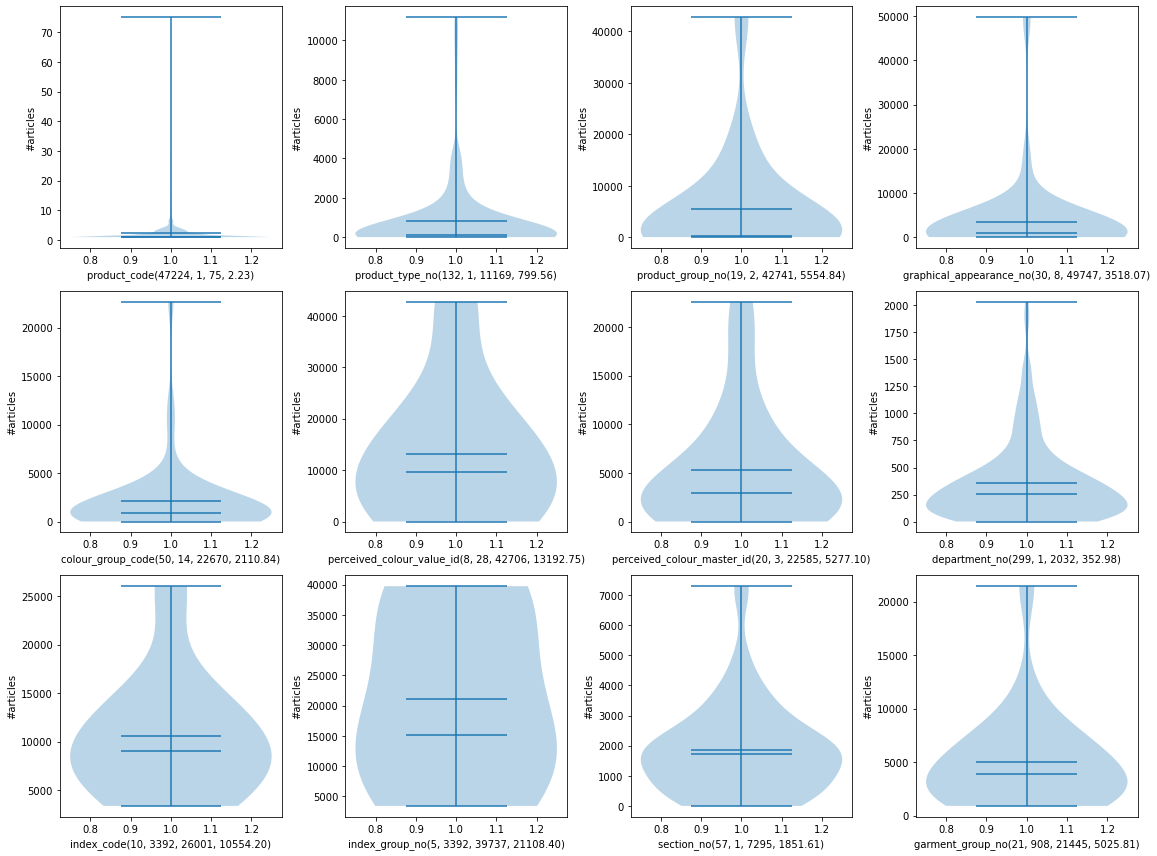

In [233]:
%time
fid, axes = plt.subplots(3, 4, figsize=(16,12))
axes = axes.flatten()
all_data = []
for idx, col in enumerate(cat_feats):
    nunique = arts[col].nunique()
    tmp = np.array(list(Counter(arts[col]).values()))
    all_data.append((col, nunique, tmp.min(), tmp.max(), tmp.mean()))
    print(f"{col:>28} : {nunique:>6}, {tmp.min():>6}, {tmp.max():>6}, {tmp.mean():>8.2f}")
    bins = nunique
#     n, *_ = axes[idx].hist(tmp, bins=100, align='mid', density=True, alpha=0.8, log=0)  # 每个类别变量的各个取值的样本数量的分布
    axes[idx].violinplot(tmp, showmeans=1, showextrema=True, showmedians=True)
    axes[idx].set_xlabel(f"{col}({nunique}, {tmp.min()}, {tmp.max()}, {tmp.mean():.2f})")
    axes[idx].set_ylabel("#articles")
    
plt.tight_layout()
plt.show()

In [234]:
df = pd.DataFrame(all_data, columns=['feature', 'nunique', 'min', 'max', 'mean'])
df

feature  nunique   min    max          mean
0                 product_code    47224     1     75      2.234923
1              product_type_no      132     1  11169    799.560606
2             product_group_no       19     2  42741   5554.842105
3      graphical_appearance_no       30     8  49747   3518.066667
4            colour_group_code       50    14  22670   2110.840000
5    perceived_colour_value_id        8    28  42706  13192.750000
6   perceived_colour_master_id       20     3  22585   5277.100000
7                department_no      299     1   2032    352.983278
8                   index_code       10  3392  26001  10554.200000
9               index_group_no        5  3392  39737  21108.400000
10                  section_no       57     1   7295   1851.614035
11            garment_group_no       21   908  21445   5025.809524

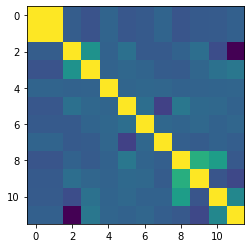

In [178]:
corr = arts.corr()
plt.imshow(corr)

# customers

`shape=(1371980, 7)`  
1. customer_id (str)：用户 id，长度为 64 的字符串
2. FN (float64, 895050)：
3. Active (float64, 907576)：
4. club_member_status (str, 6062)：
5. fashion_news_frequency (str, 166009)：
6. age (float64, 15861)：年龄
7. postal_code (str)：邮政编码

**是否重复：**无。

|    | feature                | dtype   |   num_null |   num_unique |
|---:|:-----------------------|:--------|-----------:|-------------:|
|  0 | customer_id            | str     |          0 |      1371980 |
|  1 | FN                     | float64 |     895050 |            1 |
|  2 | Active                 | float64 |     907576 |            1 |
|  3 | club_member_status     | str     |       6062 |            3 |
|  4 | fashion_news_frequency | str     |      16009 |            4 |
|  5 | age                    | float64 |      15861 |           84 |
|  6 | postal_code            | str     |          0 |       352899 |

从上表中可以看出用户信息中存在大量的

**分析**：
- 用户数据中不存在重复行
- 除了 `customer_id, postal_code` 外，其余特征均存在缺失的情况
- `FN, Active` 的缺失较多，超过了 50%，且 Active 缺失的行包含了 `FN, fashion_news_frequency` 缺失的行 
- 用户的所有特征均为类别特征，其中 `age` 也可以视作连续特征

## 基本信息

In [261]:
cus = pd.read_csv(os.path.join(data_path, "customers.csv"))
cus

customer_id   FN  Active  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
...                                                    ...  ...     ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  NaN     NaN   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  NaN     NaN   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  1.0     1.0   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  1.0     1.0   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...  NaN     NaN   

        club_member_status fashion_news_frequency   age age_binned  \
0                   ACTIVE                   NONE  49.0       40's   
1                   ACTIVE                   NONE  25.0       20's   
2                   ACTIVE                   NONE  24.0       20's   
3                   ACTIVE                   NONE  54.0       50's   
4                   ACTIVE              Regularly  52.0       50's   
...                    ...                    ...   ...        ...   
1371975             ACTIVE                   NONE  24.0       20's   
1371976             ACTIVE                   NONE  21.0       20's   
1371977             ACTIVE              Regularly  21.0       20's   
1371978             ACTIVE              Regularly  18.0       10's   
1371979         PRE-CREATE                   NONE  65.0       60's   

                                               postal_code  
0        52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1        2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2        64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3        5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4        25fa5ddee9aac01b35208d01736e57942317d756b32ddd...  
...                                                    ...  
1371975  7aa399f7e669990daba2d92c577b52237380662f36480b...  
1371976  3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...  
1371977  4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...  
1371978  8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...  
1371979  0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...  

[1371980 rows x 8 columns]

In [561]:
cus[cus.club_member_status.isna()].index.difference(cus[cus.age.isna()].index)

Int64Index([    853,     908,     940,    1152,    1307,    1410,    2298,
               2795,    3178,    3359,
            ...
            1364956, 1365760, 1365919, 1367751, 1368364, 1369886, 1370268,
            1370365, 1370368, 1371453],
           dtype='int64', length=3776)

In [556]:
cus[cus.club_member_status.isna()].FN.isna().sum()

5741

In [263]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   age_binned              1356119 non-null  object 
 7   postal_code             1371980 non-null  object 
dtypes: float64(3), object(5)
memory usage: 83.7+ MB


In [264]:
columns = cus.columns
dtypes = cus.dtypes
print(f"shape={cus.shape}")
data = []

for i, e in enumerate(columns, start=1):
    t = dtypes.iloc[i-1]
    t = "str" if t == "object" else t
    null_row = cus.loc[:, e].isnull().sum()
    nunique = cus.loc[:, e].nunique()
#     print(f"{i}. {e} ({t}{', ' + str(null_row) if null_row > 0 else ''})：")
    data.append((e, t, null_row, nunique))
    
df = pd.DataFrame(data, columns=['feature', 'dtype', 'num_null', 'num_unique'])
df

shape=(1371980, 8)


feature    dtype  num_null  num_unique
0             customer_id      str         0     1371980
1                      FN  float64    895050           1
2                  Active  float64    907576           1
3      club_member_status      str      6062           3
4  fashion_news_frequency      str     16009           4
5                     age  float64     15861          84
6              age_binned      str     15861           9
7             postal_code      str         0      352899

In [277]:
feats = ['FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age']
for feat in feats:
    unique = cus[~cus[feat].isnull()][feat].unique()
    nunique = unique.shape[0]
    print(f"{feat:>25}: {nunique} {unique}")

                       FN: 1 [1.]
                   Active: 1 [1.]
       club_member_status: 3 ['ACTIVE' 'PRE-CREATE' 'LEFT CLUB']
   fashion_news_frequency: 3 ['None' 'Regularly' 'Monthly']
                      age: 84 [49. 25. 24. 54. 52. 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22. 40.
 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34. 57.
 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46. 73.
 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97. 89.
 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


In [7]:
# 重复行
cus.duplicated().sum()

0

## 特征取值分布

统计各个特征的不同取值的样本数分布，注意：只统计了非 null 的样本

|    | feature                |   nunique |    min |     max |         mean |     sum |
|---:|:-----------------------|----------:|-------:|--------:|-------------:|--------:|
|  0 | FN                     |         1 | 476930 |  476930 | 476930       |  476930 |
|  1 | Active                 |         1 | 464404 |  464404 | 464404       |  464404 |
|  2 | club_member_status     |         3 |    467 | 1272491 | 455306       | 1365918 |
|  3 | fashion_news_frequency |         3 |    842 |  877713 | 451990       | 1355971 |
|  4 | age                    |        84 |      3 |   67530 |  16144.3     | 1356119 |
|  5 | postal_code            |    352899 |      1 |  120303 |      3.88774 | 1371980 |

In [273]:
Counter(cus['fashion_news_frequency'][cus['fashion_news_frequency'].notnull()])

Counter({'None': 877713, 'Regularly': 477416, 'Monthly': 842})

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs
                          FN :      1, 476930, 476930, 476930.00, 476930
                      Active :      1, 464404, 464404, 464404.00, 464404
          club_member_status :      3,    467, 1272491, 455306.00, 1365918
      fashion_news_frequency :      3,    842, 877713, 451990.33, 1355971
                         age :     84,      3,  67530, 16144.27, 1356119
                 postal_code : 352899,      1, 120303,     3.89, 1371980


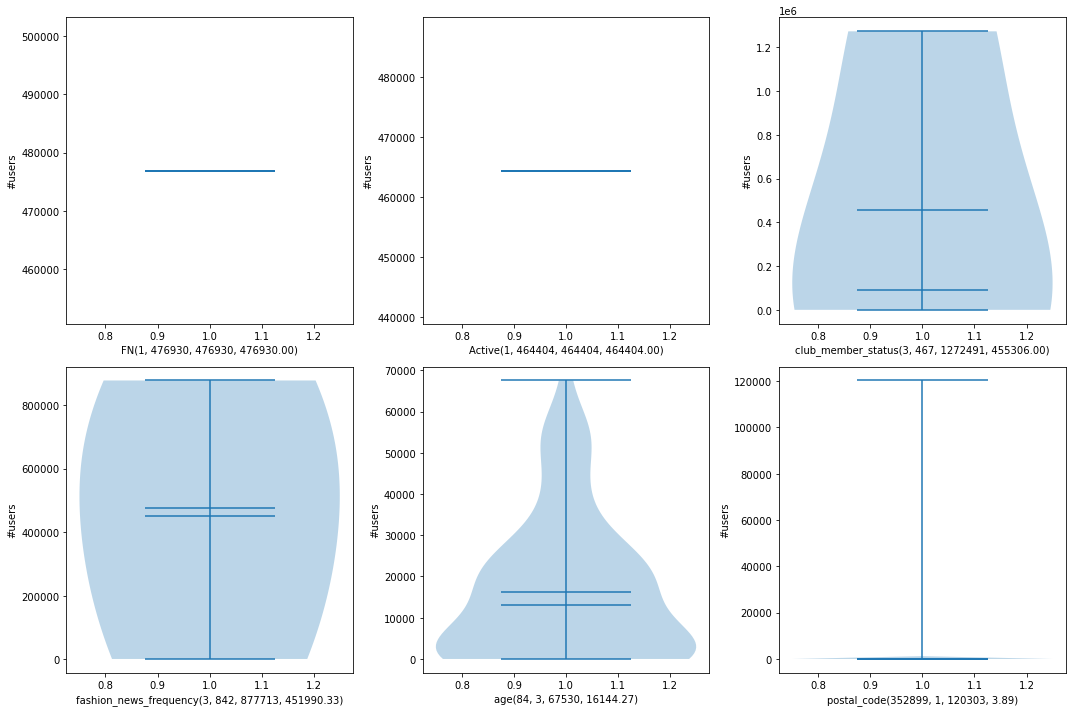

In [274]:
%time
cat_feats = ['FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']
fid, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
all_data = []
for idx, col in enumerate(cat_feats):
    cnt = Counter(cus[col][cus[col].notnull()])
    nunique = len(cnt)
    tmp = np.array(list(cnt.values()))
    all_data.append((col, nunique, tmp.min(), tmp.max(), tmp.mean(), tmp.sum()))
    print(f"{col:>28} : {nunique:>6}, {tmp.min():>6}, {tmp.max():>6}, {tmp.mean():>8.2f}, {tmp.sum()}")
    bins = nunique
#     n, *_ = axes[idx].hist(tmp, bins=100, align='mid', density=True, alpha=0.8, log=0)  # 每个类别变量的各个取值的样本数量的分布
    axes[idx].violinplot(tmp, showmeans=1, showextrema=True, showmedians=True)
    axes[idx].set_xlabel(f"{col}({nunique}, {tmp.min()}, {tmp.max()}, {tmp.mean():.2f})")
    axes[idx].set_ylabel("#users")
    
plt.tight_layout()
plt.show()

In [275]:
df = pd.DataFrame(all_data, columns=['feature', 'nunique', 'min', 'max', 'mean', 'sum'])
df

feature  nunique     min      max           mean      sum
0                      FN        1  476930   476930  476930.000000   476930
1                  Active        1  464404   464404  464404.000000   464404
2      club_member_status        3     467  1272491  455306.000000  1365918
3  fashion_news_frequency        3     842   877713  451990.333333  1355971
4                     age       84       3    67530   16144.273810  1356119
5             postal_code   352899       1   120303       3.887741  1371980

## 交叉分析

10's     71583
20's    528358
30's    234068
40's    204118
50's    226242
60's     72623
70's     17611
80's      1415
90's       101
Name: age_binned, dtype: int64


<AxesSubplot:>

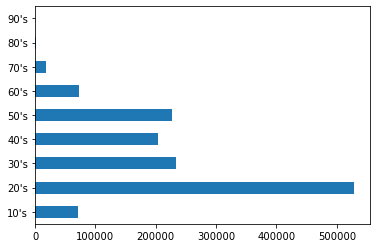

In [174]:
print(cus['age_binned'].value_counts(sort=False))
cus['age_binned'].value_counts(sort=False).plot.barh()#.hist()

In [519]:
def show_datatable(table, cmap):
    """
    绘制两个类别特征的共现矩阵，行列为特征的取值，矩阵中的元素为两个特征共现的次数
    """
    ylabel = table.index.name
    xlabel = table.columns.name
    yticklabels = table.index
    xticklabels = table.columns
    
    cm = table.to_numpy()
    m, n = cm.shape
    if m > n:
        m, n = n, m
        cm = cm.T
        xlabel, ylabel = ylabel, xlabel
        xticklabels, yticklabels = yticklabels, xticklabels
    fig, axes = plt.subplots(figsize=(m*4, n*4))
    ax0 = axes.imshow(cm, cmap=cmap)
    axes.set_xticks(range(n), xticklabels)
    axes.set_yticks(range(m), yticklabels)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
    thresh = np.nanmean(cm) / 2.
    s = np.nansum(cm)
    
    for i in range(m):
        for j in range(n):
            text = f"{'nan' if np.isnan(cm[i,j]) else cm[i,j]}\n({(100*cm[i,j]/s if not np.isnan(cm[i,j]) else 0):.2f}%)"
            plt.text(j, i, text, horizontalalignment="center", 
                     color="white" if cm[i, j] > thresh else "black",
                    )#fontsize="large")
    fig.colorbar(ax0, ax=ax)
    plt.show()

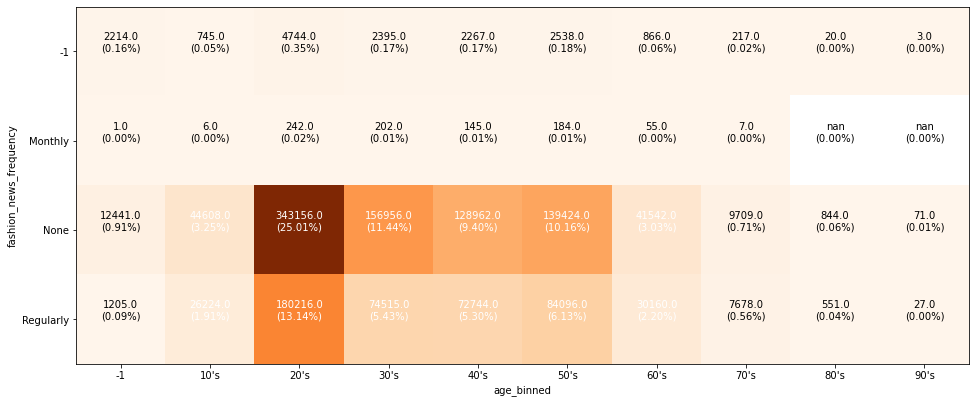

In [523]:
col1, col2 = "fashion_news_frequency", "age_binned"
tmp = cus[[col1, col2]]
tmp = tmp.fillna(-1)
tab = tmp.groupby([col1, col2]).size().reset_index()
tab = tab.pivot(col1, col2, 0)
# tab = tab.fillna(0)
show_datatable(tab, cmap=plt.cm.Oranges)

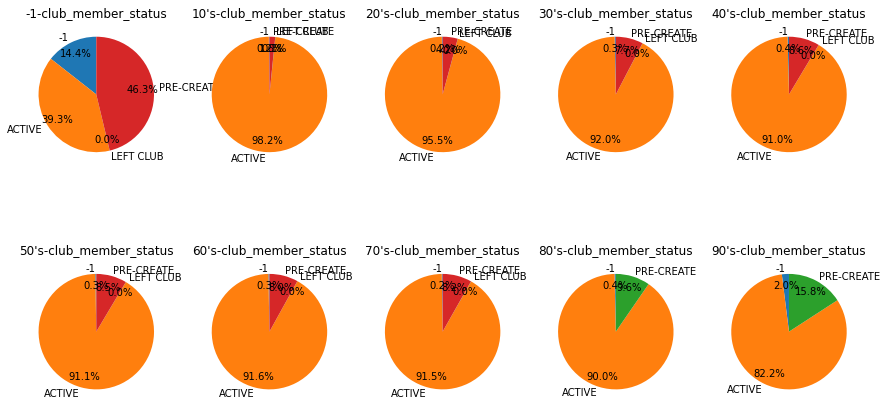

In [522]:
# 可视化两个变量之间的关系
col1, col2 = "age_binned", "club_member_status"
tmp = cus[[col1, col2]]
tmp = tmp.fillna(-1)
a = tmp.groupby([col1, col2]).size().reset_index()
feats1 = a[col1].unique()#.sort_values()

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, ab in enumerate(feats1):
    tmp = a[a[col1] == ab]
#     print(tmp)
    labels = tmp.iloc[:, 1]
    axes[i].pie(tmp[0], labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.8)
    axes[i].set_title(f"{ab}-{col2}")
#     break

# transactions

`shape=(31788324, 5)`  
特征：
1. t_dat (str)：交易日期，2018-09-20 ~ 2020-09-22，共 734 个值
2. customer_id (str)：用户 id
3. article_id (int64)：物品 id
4. price (float64)：价格，最大值为 0.5915。实数型特征，但是单位不确定
5. sales_channel_id (int64)：交易频道 id

重复了 **2974905** 行数据。

|    | feature          | dtype   |   num_null |   num_unique |
|---:|:-----------------|:--------|-----------:|-------------:|
|  0 | t_dat            | str     |          0 |          734 |
|  1 | customer_id      | str     |          0 |      1362281 |
|  2 | article_id       | int64   |          0 |       104547 |
|  3 | price            | float64 |          0 |         9857 |
|  4 | sales_channel_id | int64   |          0 |            2 |

**分析**：
- 交易数据中存在 **2974905** 行重复数据，代表用户的重复购买行为
- 不存在缺失值
- **有 9699 个用户不存在交易记录，有 995 个物品未被用户购买过**，这些 用户/物品 可能需要冷启动处理

## 基本信息

In [28]:
%time
trans = pd.read_csv(os.path.join(data_path, "transactions_train.csv"))
trans

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


t_dat                                        customer_id  \
0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
3         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
4         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
...              ...                                                ...   
31788319  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788320  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788321  2020-09-22  fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...   
31788322  2020-09-22  fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...   
31788323  2020-09-22  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   

          article_id     price  sales_channel_id  
0          663713001  0.050831                 2  
1          541518023  0.030492                 2  
2          505221004  0.015237                 2  
3          685687003  0.016932                 2  
4          685687004  0.016932                 2  
...              ...       ...               ...  
31788319   929511001  0.059305                 2  
31788320   891322004  0.042356                 2  
31788321   918325001  0.043203                 1  
31788322   833459002  0.006763                 1  
31788323   898573003  0.033881                 2  

[31788324 rows x 5 columns]

In [579]:
trans.customer_id.apply(lambda x: int(x[-16:], 16)).info()#.str.astype('int32')

<class 'pandas.core.series.Series'>
RangeIndex: 31788324 entries, 0 to 31788323
Series name: customer_id
Non-Null Count     Dtype 
--------------     ----- 
31788324 non-null  uint64
dtypes: uint64(1)
memory usage: 242.5 MB


In [581]:
trans.customer_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 31788324 entries, 0 to 31788323
Series name: customer_id
Non-Null Count     Dtype 
--------------     ----- 
31788324 non-null  object
dtypes: object(1)
memory usage: 242.5+ MB


In [49]:
trans.describe()

article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00

In [86]:
# 重复的行数
trans.duplicated().sum()

2974905

In [525]:
columns = trans.columns
dtypes = trans.dtypes
n_row = trans.shape[0]
print(f"shape={trans.shape}")
data = []

for i, e in enumerate(columns, start=1):
    t = dtypes.iloc[i-1]
    t = "str" if t == "object" else t
    null_row = trans.loc[:, e].isnull().sum()
    nunique = trans.loc[:, e].nunique()
    print(f"{i}. {e} ({t}{', ' + str(null_row) if null_row > 0 else ''})：")
    data.append((e, t, null_row, nunique))
    
df = pd.DataFrame(data, columns=['feature', 'dtype', 'num_null', 'num_unique'])
df

shape=(31788324, 5)
1. t_dat (str)：
2. customer_id (str)：
3. article_id (int64)：
4. price (float64)：
5. sales_channel_id (int64)：


feature    dtype  num_null  num_unique
0             t_dat      str         0         734
1       customer_id      str         0     1362281
2        article_id    int64         0      104547
3             price  float64         0        9857
4  sales_channel_id    int64         0           2

In [58]:
nusers = trans['customer_id'].unique()
all_users = cus['customer_id'].unique()
nusers = set(nusers)
all_users = set(all_users)
not_appear = all_users - nusers
len(not_appear)

9699

In [59]:
narts = trans['article_id'].unique()
all_arts = arts['article_id'].unique()
narts = set(narts)
all_arts = set(all_arts)
not_appear = all_arts - narts
len(not_appear)

995

## 特征取值分布

注意：统计的是取值为非 null 的样本。

|    | feature          |   nunique |     min |      max |            mean |      sum |
|---:|:-----------------|----------:|--------:|---------:|----------------:|---------:|
|  0 | t_dat            |       734 |   12760 |   198622 | 43308.3         | 31788324 |
|  1 | customer_id      |   1362281 |       1 |     1895 |    23.3346      | 31788324 |
|  2 | article_id       |    104547 |       1 |    50287 |   304.058       | 31788324 |
|  3 | price            |      9857 |       1 |  3416921 |  3224.95        | 31788324 |
|  4 | sales_channel_id |         2 | 9408462 | 22379862 |     1.58942e+07 | 31788324 |

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
                       t_dat :      734,    12760,   198622, 43308.34, 31788324
                 customer_id :  1362281,        1,     1895,    23.33, 31788324
                  article_id :   104547,        1,    50287,   304.06, 31788324
                       price :     9857,        1,  3416921,  3224.95, 31788324
            sales_channel_id :        2,  9408462, 22379862, 15894162.00, 31788324


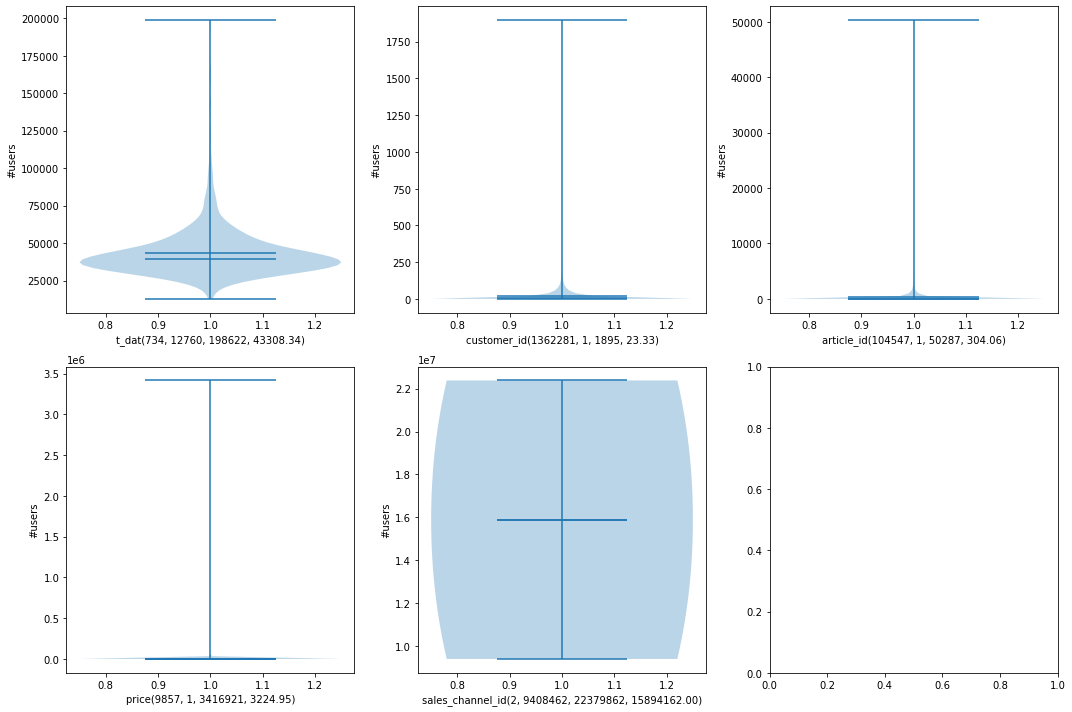

In [528]:
%time
cat_feats = ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']
fid, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
all_data = []
for idx, col in enumerate(cat_feats):
    cnt = Counter(trans[col])
    nunique = len(cnt)
    tmp = np.array(list(cnt.values()))
    all_data.append((col, nunique, tmp.min(), tmp.max(), tmp.mean(), tmp.sum()))
    print(f"{col:>28} : {nunique:>8}, {tmp.min():>8}, {tmp.max():>8}, {tmp.mean():>8.2f}, {tmp.sum()}")
    bins = nunique
#     n, *_ = axes[idx].hist(tmp, bins=100, align='mid', density=True, alpha=0.8, log=0)  # 每个类别变量的各个取值的样本数量的分布
    axes[idx].violinplot(tmp, showmeans=1, showextrema=True, showmedians=True)
    axes[idx].set_xlabel(f"{col}({nunique}, {tmp.min()}, {tmp.max()}, {tmp.mean():.2f})")
    axes[idx].set_ylabel("#users")
    
plt.tight_layout()
plt.show()

In [132]:
df = pd.DataFrame(all_data, columns=['feature', 'nunique', 'min', 'max', 'mean', 'sum'])
df

feature  nunique      min       max          mean       sum
0             t_dat      734    12760    198622  4.330834e+04  31788324
1       customer_id  1362281        1      1895  2.333463e+01  31788324
2        article_id   104547        1     50287  3.040577e+02  31788324
3             price     9857        1   3416921  3.224949e+03  31788324
4  sales_channel_id        2  9408462  22379862  1.589416e+07  31788324

In [564]:
pd.to_datetime(trans.t_dat)

0          2018-09-20
1          2018-09-20
2          2018-09-20
3          2018-09-20
4          2018-09-20
              ...    
31788319   2020-09-22
31788320   2020-09-22
31788321   2020-09-22
31788322   2020-09-22
31788323   2020-09-22
Name: t_dat, Length: 31788324, dtype: datetime64[ns]

In [537]:
def show_trans(user=None, item=None, xtick_step=1, bar=True):
    """
    可视化购买数量随时间的变化
    -------------------------
    user: 用户 id, 若指定了用户 id, 则可视化该用户每一天的购买数量
    item: 物品 id, 若没有指定用户 id 但指定了物品 id, 则可视化该物品每天被购买的次数. 若 user 和 item 都没有指定, 则可视化所有用户每天的购买数量之和
    
    """
    if user is not None:
        cnt = Counter(trans[trans['customer_id'] == user]['t_dat'])
        title = f"{user}"
    elif item is not None:
        cnt = Counter(trans[trans['article_id'] == item]['t_dat'])
        title = f"{item}"
    else:
        cnt = Counter(trans['t_dat'])
        title = f"transaction"
        
    cnt = [(dat, n) for dat, n in cnt.items()]
    cnt = sorted(cnt, key=lambda x: x[0])
    dats = [e[0] for e in cnt]
    nums = [e[1] for e in cnt]
#     print(dats, nums)
    
    # 绘制
    fig, ax = plt.subplots(figsize=(20,10))
    if bar:
        ax.bar(range(len(dats)), nums)
    else:
        ax.plot(range(len(dats)), nums)
    ax.set_title(title)
    ax.set_xlabel("date")
    ax.set_ylabel("#purchases")
    
    xticks = [i for i in range(0, len(dats), xtick_step)]
    xlabels = [dats[i] for i in range(0, len(dats), xtick_step)]
    _ = ax.set_xticks(ticks=xticks)
    _ = ax.set_xticklabels(labels=xlabels, rotation=-30)

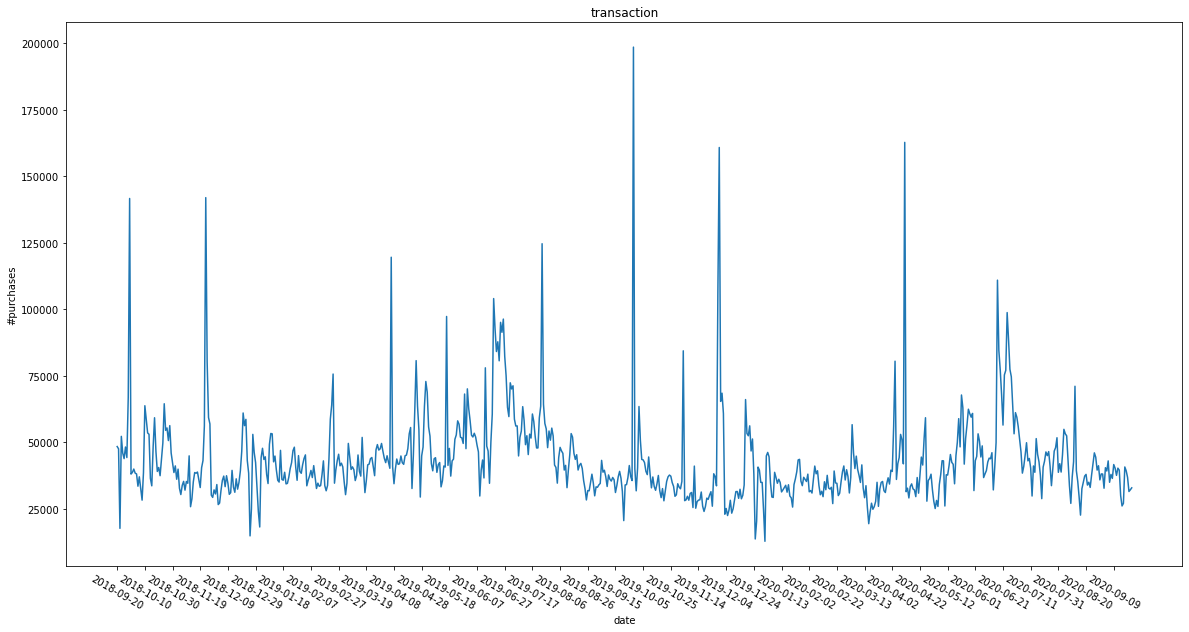

In [535]:
show_trans(xtick_step=20, bar=0)

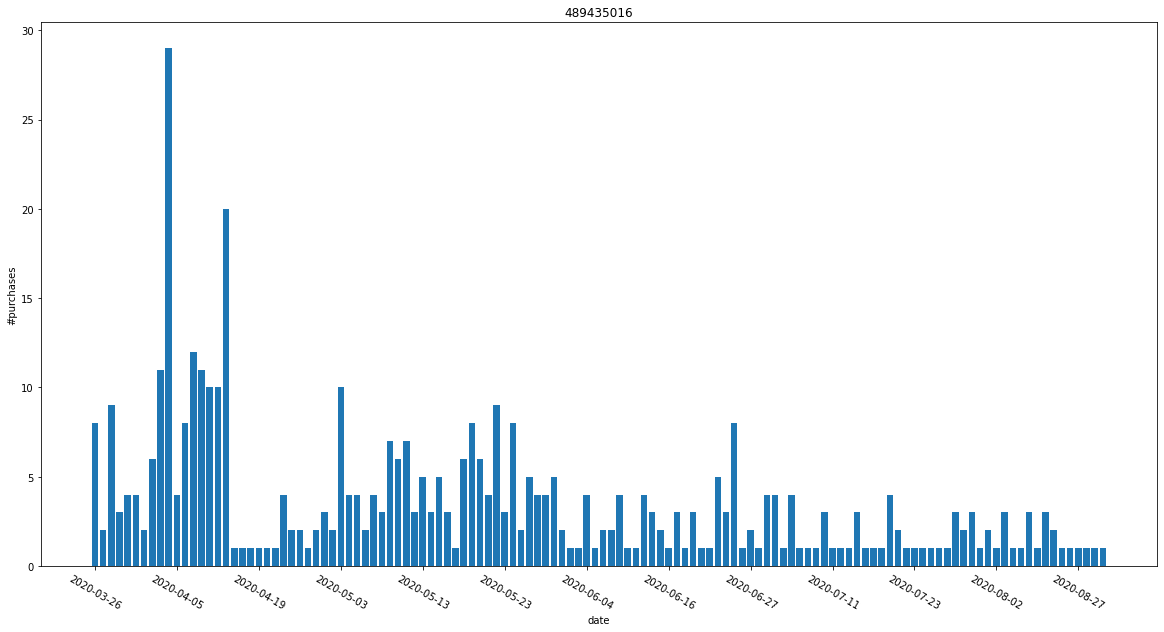

In [538]:
item = arts['article_id'].iloc[5061]
show_trans(item=item, xtick_step=10)

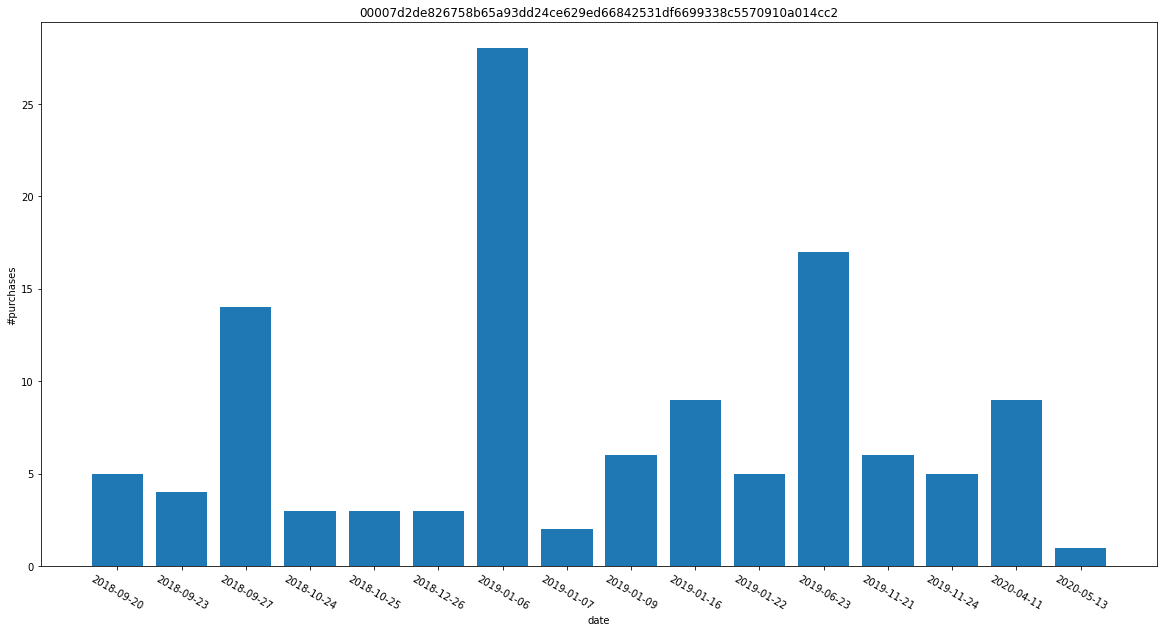

In [130]:
user = cus['customer_id'].iloc[7]
show_trans(user=user, xtick_step=1)

## 交叉分析

In [524]:
corr = trans.corr()
corr

article_id     price  sales_channel_id
article_id          1.000000  0.141169          0.085231
price               0.141169  1.000000          0.165802
sales_channel_id    0.085231  0.165802          1.000000

## Customers Who Bought This Frequently Buy This
来源：[Customers Who Bought This Frequently Buy This](https://www.kaggle.com/code/cdeotte/customers-who-bought-this-frequently-buy-this/notebook)

In [612]:
trans.loc[(trans.customer_id.isin(USERS))&(trans.article_id!=749400009),[ 'article_id']].value_counts()

article_id
720125001     476
749400003     380
730683001     366
706016001     355
749400010     354
             ... 
626959001       1
626894001       1
626890004       1
770359001       1
952938001       1
Length: 39866, dtype: int64

In [622]:
trans.article_id.unique()

array([663713001, 541518023, 505221004, ..., 539060028, 810737015,
       533261032], dtype=int32)

In [633]:
import pickle as pkl
with open('pairs.dict', 'wb') as f:
    pkl.dump(pairs, f)

In [583]:
%time
# FIND ITEMS PURCHASED TOGETHER
trans.article_id = trans.article_id.astype('int32')
vc = trans.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values[1000:1032]):
    #if j%10==0: print(j,', ',end='')
    USERS = trans.loc[trans.article_id==i.item(),'customer_id'].unique()
    vc2 = trans.loc[(trans.customer_id.isin(USERS))&(trans.article_id!=i.item()),'article_id'].value_counts()
    pairs[i.item()] = [vc2.index[0], vc2.index[1], vc2.index[2]]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


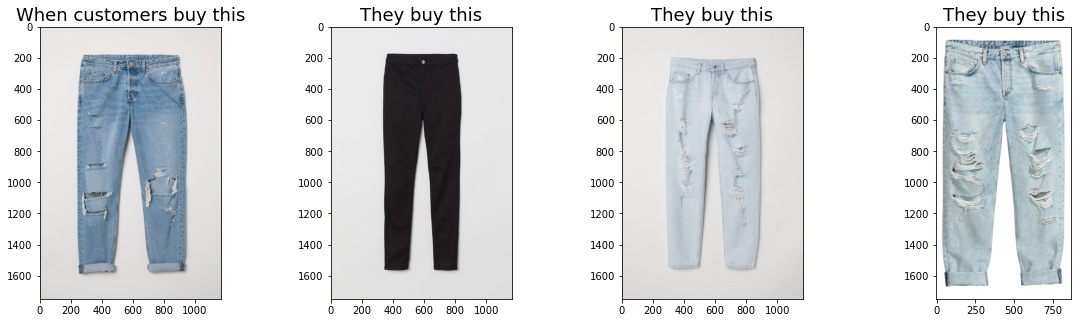

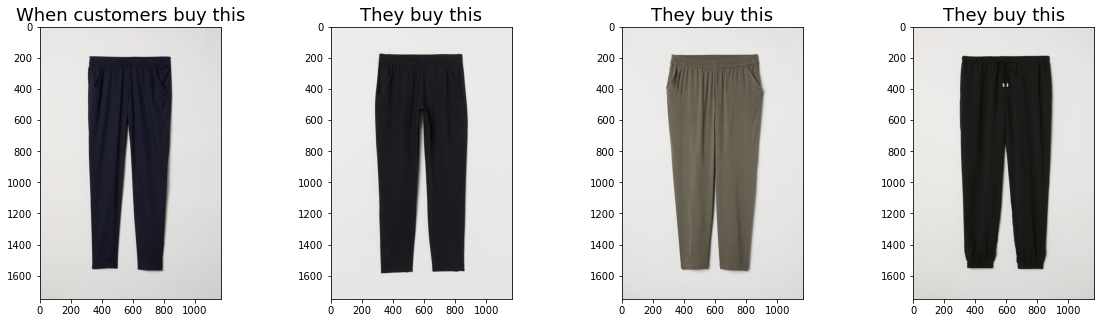

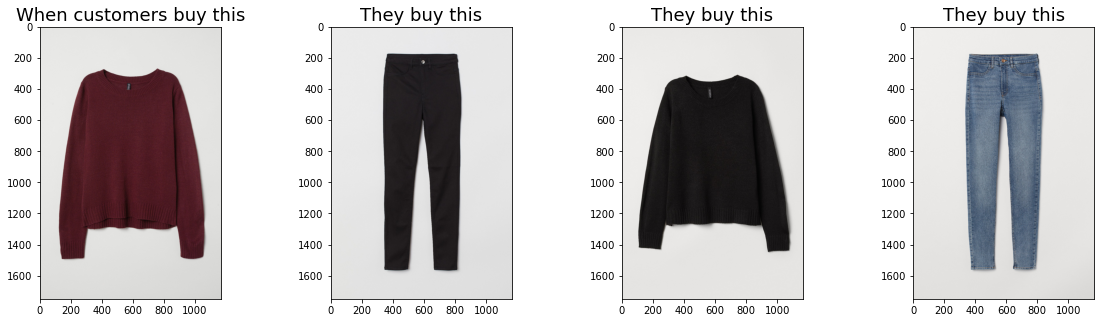

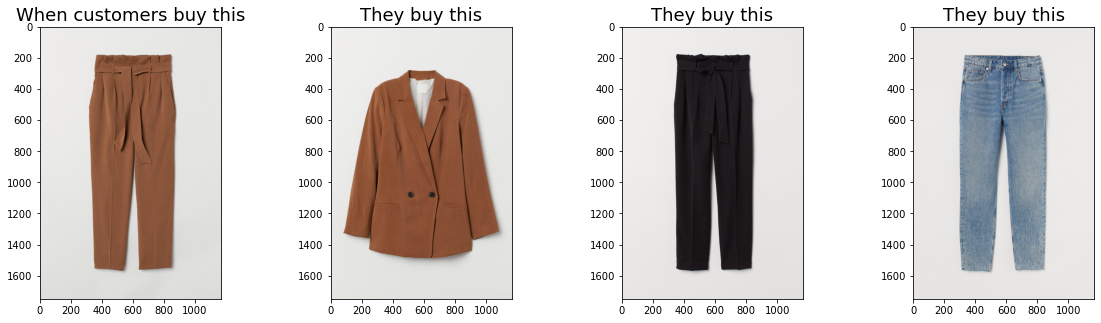

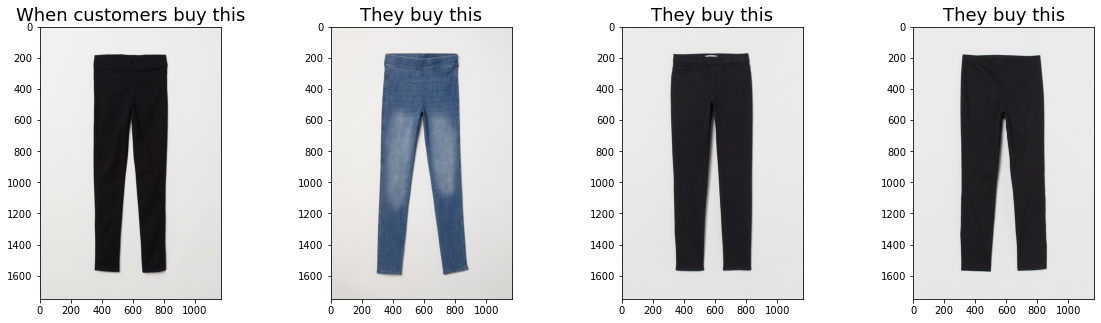

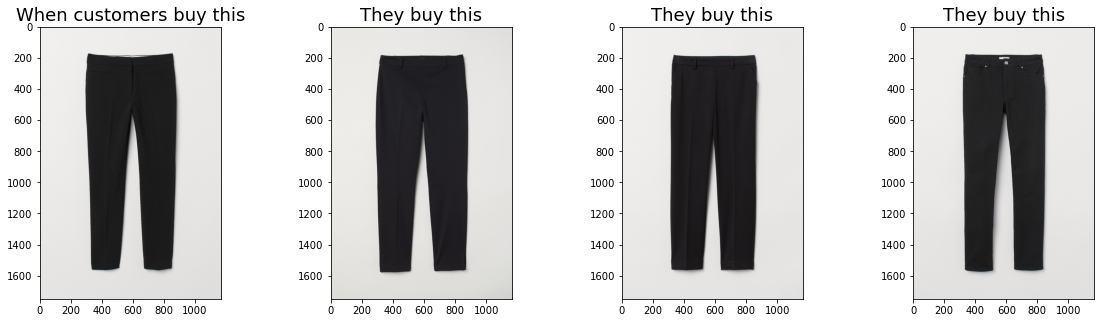

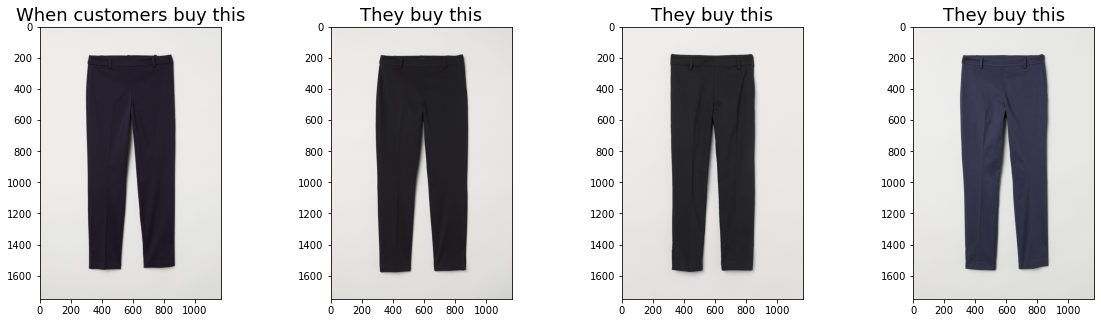

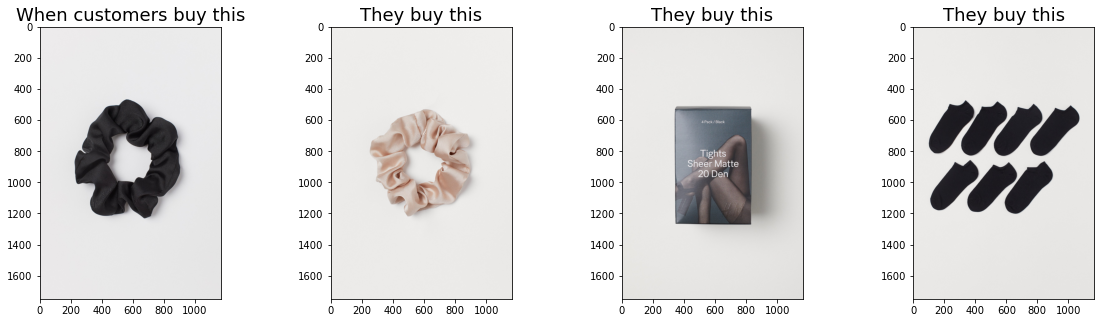

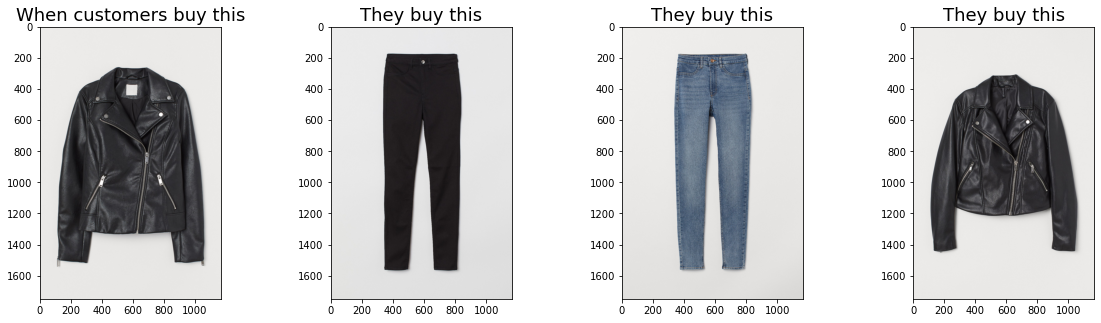

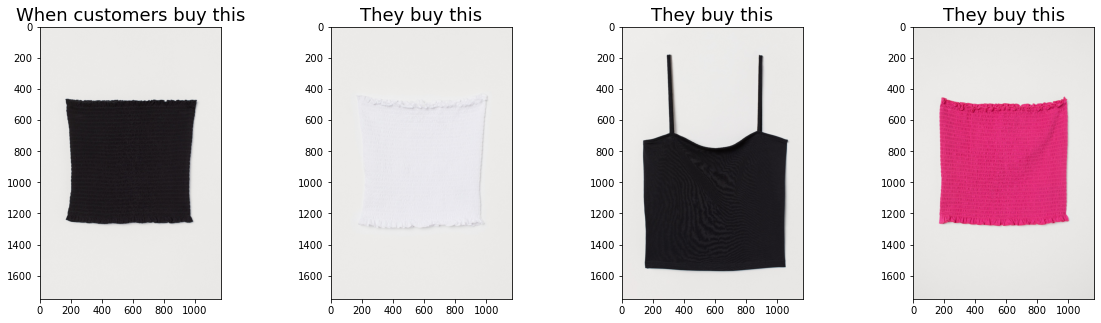

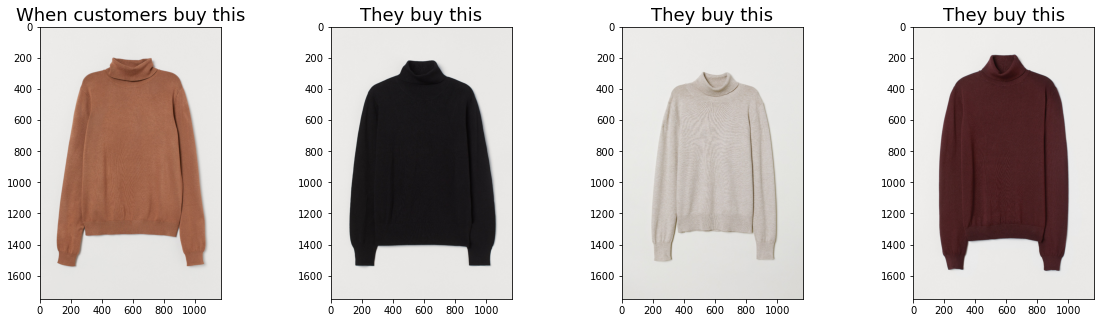

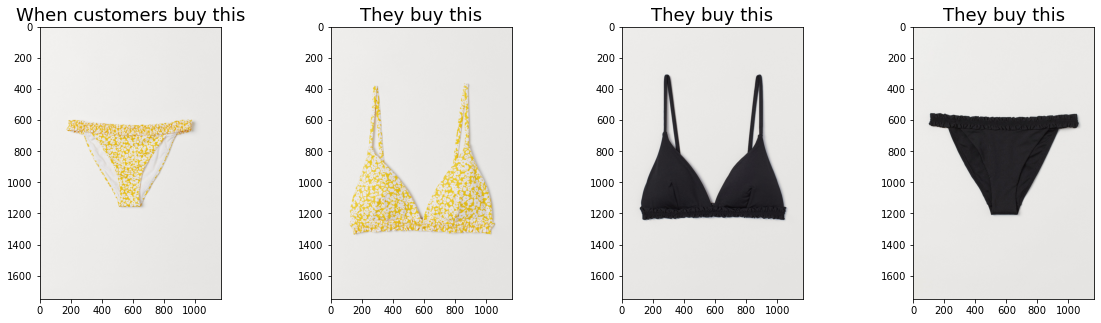

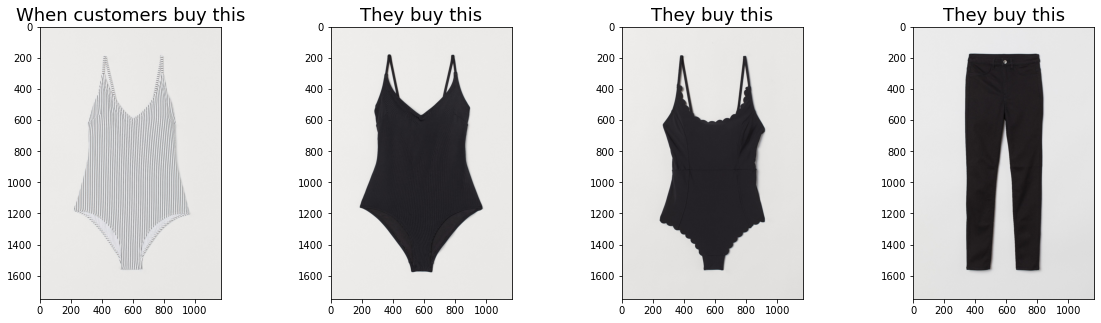

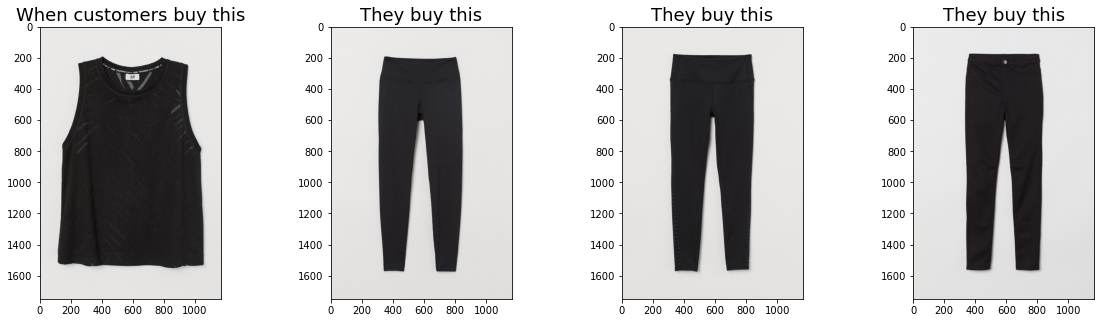

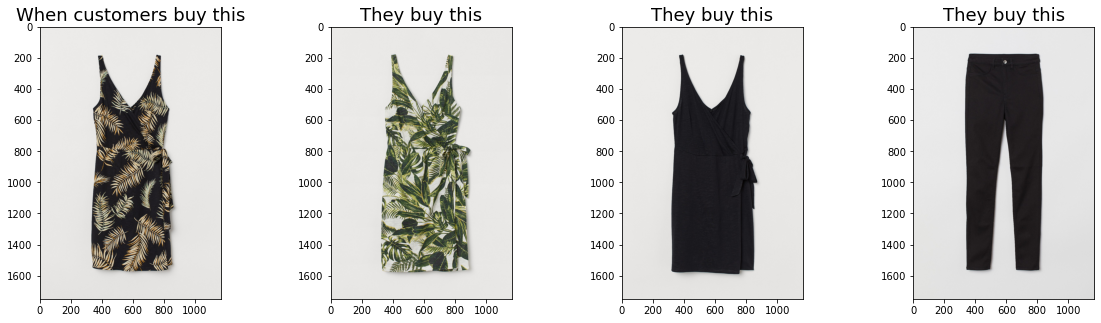

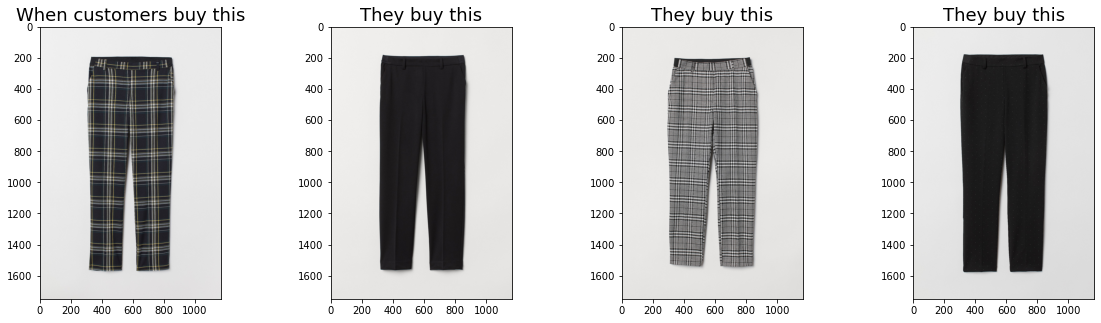

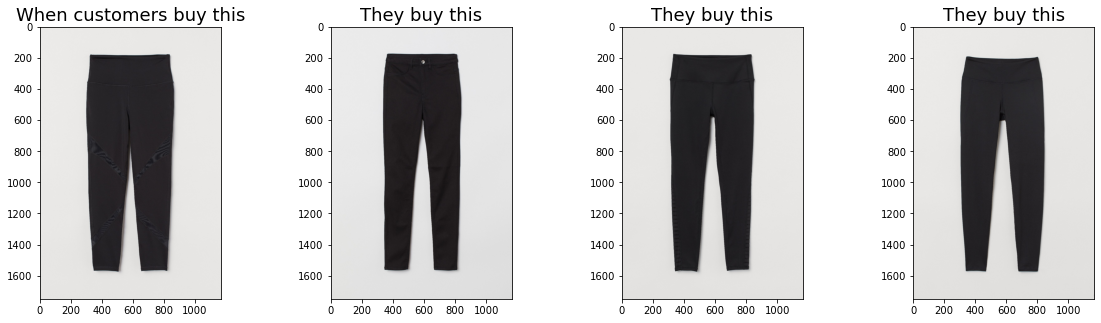

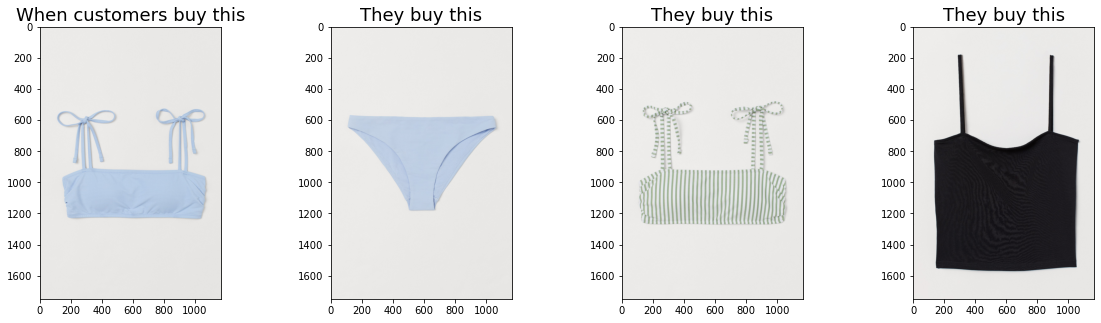

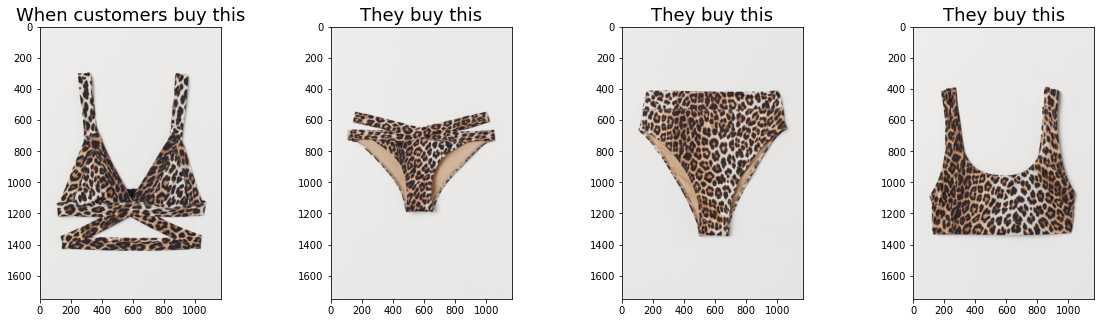

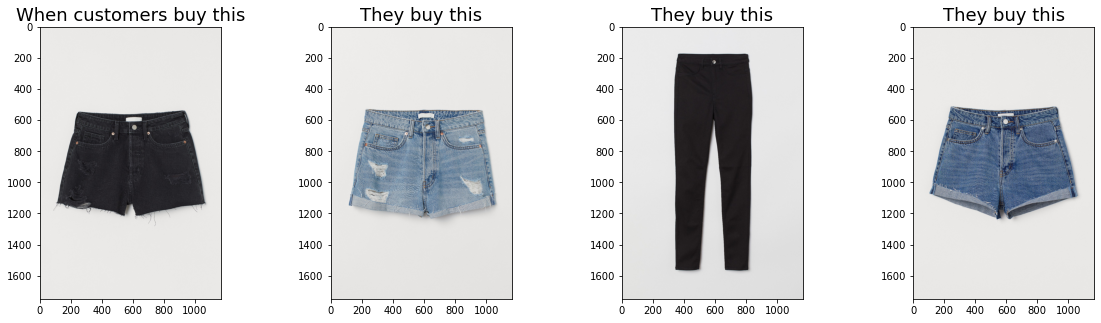

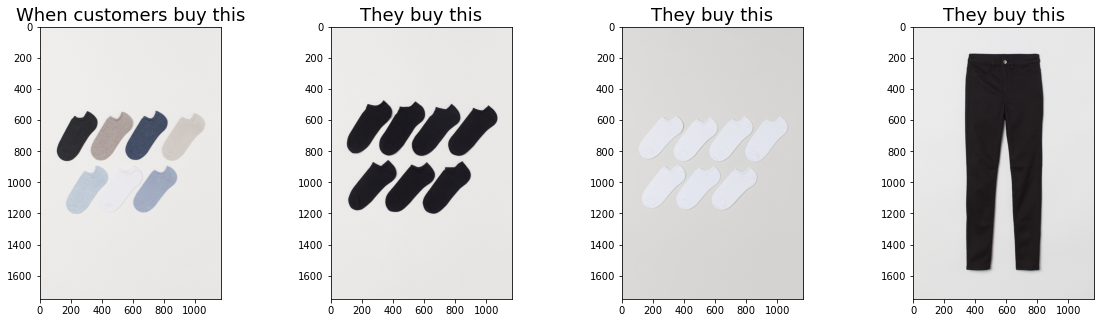

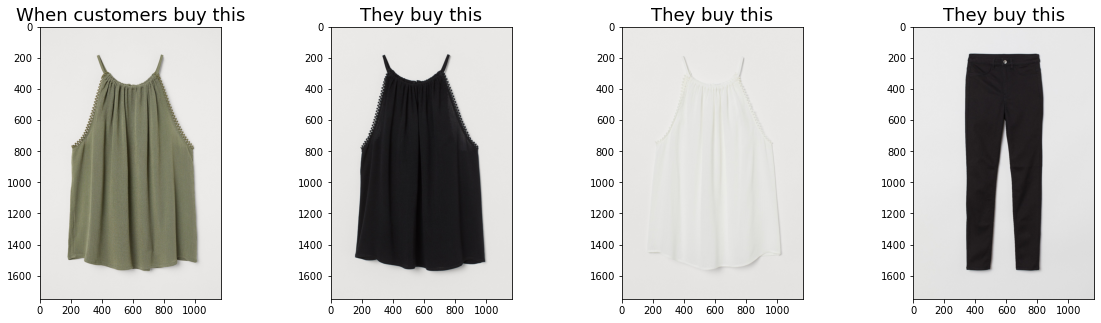

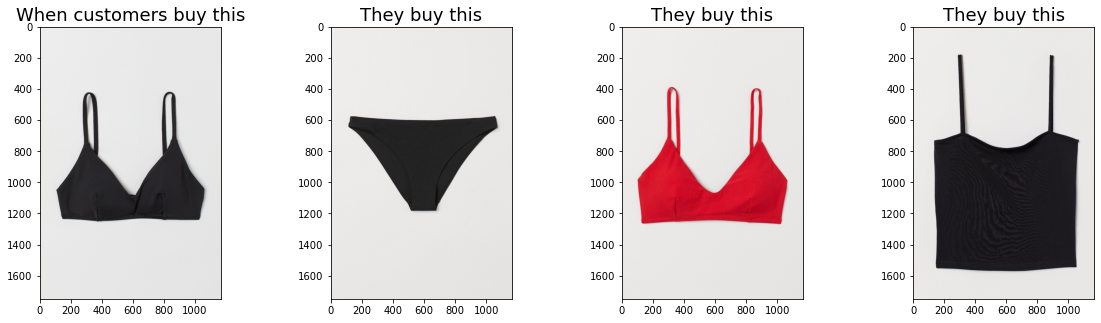

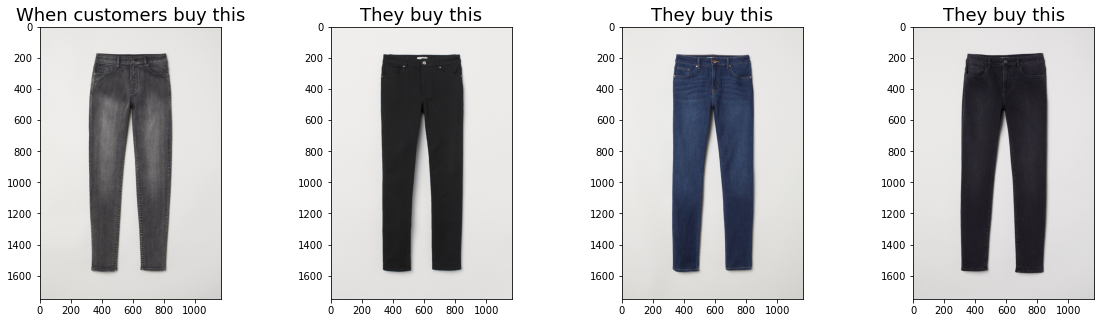

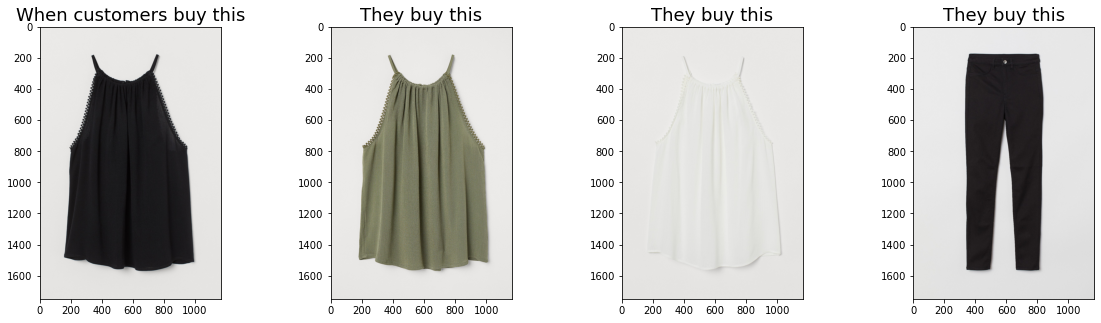

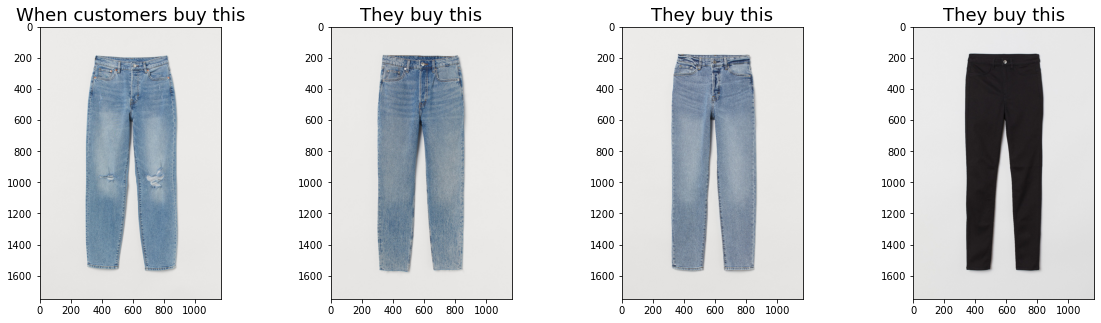

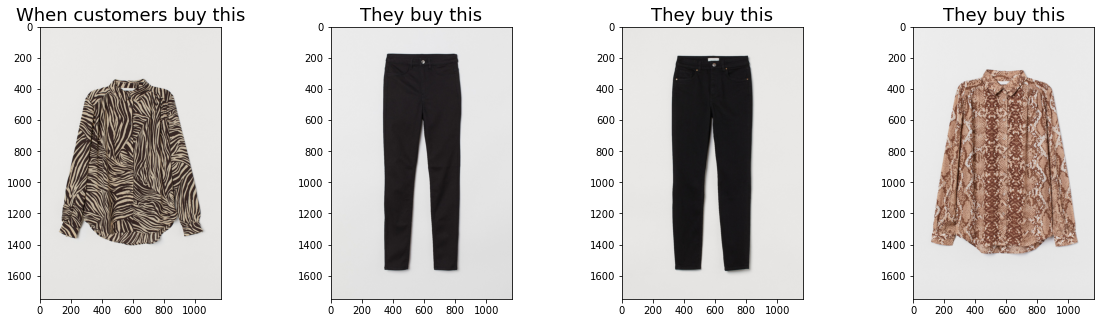

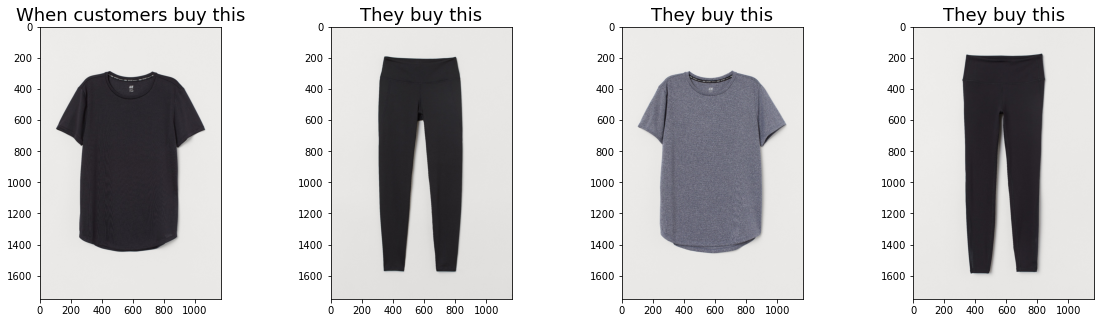

In [592]:
import matplotlib.image as mpimg
items = arts
BASE = os.path.join(data_path, "images/")
for i,(k,v) in enumerate( pairs.items() ):
    name1 = BASE+'0'+str(k)[:2]+'/0'+str(k)+'.jpg'
    name2 = BASE+'0'+str(v[0])[:2]+'/0'+str(v[0])+'.jpg'
    name3 = BASE+'0'+str(v[1])[:2]+'/0'+str(v[1])+'.jpg'
    name4 = BASE+'0'+str(v[2])[:2]+'/0'+str(v[2])+'.jpg'
    if os.path.exists(name1) & os.path.exists(name2) & os.path.exists(name3) & os.path.exists(name4):
        plt.figure(figsize=(20,5))
        img1 = mpimg.imread(name1)  # cv2.imread(name1)[:,:,::-1]
        img2 = mpimg.imread(name2)  # cv2.imread(name2)[:,:,::-1]
        img3 = mpimg.imread(name3)  # cv2.imread(name3)[:,:,::-1]
        img4 = mpimg.imread(name4)  # cv2.imread(name4)[:,:,::-1]
        plt.subplot(1,4,1)
        plt.title('When customers buy this',size=18)
        plt.imshow(img1)
        plt.subplot(1,4,2)
        plt.title('They buy this',size=18)
        plt.imshow(img2)
        plt.subplot(1,4,3)
        plt.title('They buy this',size=18)
        plt.imshow(img3)
        plt.subplot(1,4,4)
        plt.title('They buy this',size=18)
        plt.imshow(img4)
        plt.show()

In [591]:
name1

'./data/images074/0749400009.jpg'

# submission

提交文件，分为两列：
- customer_id：用户 id，包含了用户表中的所有用户
- prediction：物品列表，计算时只考虑 top 12 的物品，未来七天内用户可能购买的物品

评估方式：
$$
MAP@12 = \frac{1}{U} \sum_{u=1}^{U}  \sum_{k=1}^{min(n,12)} P(k) \times rel(k)
$$
其中，$U$ 表示用户集合，$P(k)$ 是到 $k$ 为止的查准率（precision，即前 $k$ 个物品里有多少是用户真的购买了的），$n$ 是为每个用户推荐的数量，$rel(k)$ 是一个指示函数，如果第 $k$ 的推荐是相关的则为 1，否则为 0。通过评估指标可以看出：
- 推荐的列表要尽可能是用户会购买的物品
- 用户购买的可能性越高，应该排在越前面
- 最终的推荐列表应该是用户最可能购买的物品

In [135]:
sub = pd.read_csv(os.path.join(data_path, "sample_submission.csv"))
sub

customer_id  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   
...                                                    ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...   

                                                prediction  
0        0706016001 0706016002 0372860001 0610776002 07...  
1        0706016001 0706016002 0372860001 0610776002 07...  
2        0706016001 0706016002 0372860001 0610776002 07...  
3        0706016001 0706016002 0372860001 0610776002 07...  
4        0706016001 0706016002 0372860001 0610776002 07...  
...                                                    ...  
1371975  0706016001 0706016002 0372860001 0610776002 07...  
1371976  0706016001 0706016002 0372860001 0610776002 07...  
1371977  0706016001 0706016002 0372860001 0610776002 07...  
1371978  0706016001 0706016002 0372860001 0610776002 07...  
1371979  0706016001 0706016002 0372860001 0610776002 07...  

[1371980 rows x 2 columns]

In [144]:
arts.iloc[:,0].min()

108775015

In [141]:
sub.loc[110].iloc[1].split()

['0706016001',
 '0706016002',
 '0372860001',
 '0610776002',
 '0759871002',
 '0464297007',
 '0372860002',
 '0610776001',
 '0399223001',
 '0706016003',
 '0720125001',
 '0156231001']

In [136]:
sub.shape, sub.customer_id.nunique()

((1371980, 2), 1371980)

In [137]:
nusers = sub['customer_id'].unique()
nusers = set(nusers)
not_appear = all_users - nusers
len(not_appear)

0

In [149]:
arts[arts['article_id'] == 706016001]

article_id  product_code                 prod_name  product_type_no  \
53892   706016001        706016  Jade HW Skinny Denim TRS              272   

      product_type_name  product_group_no  product_group_name  \
53892          Trousers                 7  Garment Lower body   

       graphical_appearance_no graphical_appearance_name  colour_group_code  \
53892                  1010016                     Solid                  9   

       ... department_name  index_code index_name  index_group_no  \
53892  ...        Trousers           D    Divided               2   

      index_group_name  section_no        section_name garment_group_no  \
53892          Divided          53  Divided Collection             1009   

      garment_group_name                                        detail_desc  
53892           Trousers  High-waisted jeans in washed superstretch deni...  

[1 rows x 26 columns]